In [119]:
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus=False)
warnings.filterwarnings('ignore')
df = pd.read_csv('Before_onehot(상해_사고유형뺌).csv')

In [120]:
df = df[['요일', '법규위반', '노면상태', '기상상태', 'EPDO', '사고유형_1', 'cctv_count', 'bus_count', '주차장_count',
       '어린이보호구역_count', '가해운전자 연령대', '피해운전자 연령대', '사고시간대', '도로형태']]
df.shape

(3159, 14)

In [121]:
import pandas as pd

# 원본 데이터프레임에서 범주형 변수 열 선택
categorical_columns = ['요일', '법규위반', '노면상태', '기상상태','사고유형_1',
                       '가해운전자 연령대', '피해운전자 연령대', '사고시간대', '도로형태']  # 범주형 변수의 열 이름을 적절히 수정

# 범주형 변수 열에 대해 원핫인코딩 수행
onehot_encoded = pd.get_dummies(df[categorical_columns])

# 기존 데이터프레임과 원핫인코딩 결과 합치기
df_encoded = pd.concat([df, onehot_encoded], axis=1)

# 원핫인코딩 된 열 제거
df1 = df_encoded.drop(categorical_columns, axis=1)
df1.columns

Index(['EPDO', 'cctv_count', 'bus_count', '주차장_count', '어린이보호구역_count',
       '요일_금요일', '요일_목요일', '요일_수요일', '요일_월요일', '요일_일요일', '요일_토요일', '요일_화요일',
       '법규위반_교차로운행방법위반', '법규위반_기타', '법규위반_보행자보호의무위반', '법규위반_불법유턴', '법규위반_신호위반',
       '법규위반_안전거리미확보', '법규위반_안전운전불이행', '법규위반_중앙선침범', '법규위반_직진우회전진행방해',
       '법규위반_차로위반', '노면상태_건조', '노면상태_기타', '노면상태_서리/결빙', '노면상태_적설',
       '노면상태_젖음/습기', '기상상태_기타', '기상상태_눈', '기상상태_맑음', '기상상태_비', '기상상태_흐림',
       '사고유형_1_차대사람 ', '사고유형_1_차대차 ', '사고유형_1_차량단독 ', '가해운전자 연령대_노년',
       '가해운전자 연령대_미분류', '가해운전자 연령대_장년', '가해운전자 연령대_중년', '가해운전자 연령대_청년',
       '가해운전자 연령대_청소년', '피해운전자 연령대_노년', '피해운전자 연령대_미분류', '피해운전자 연령대_장년',
       '피해운전자 연령대_중년', '피해운전자 연령대_청년', '피해운전자 연령대_청소년', '사고시간대_새벽', '사고시간대_오후',
       '사고시간대_저녁', '사고시간대_점심', '사고시간대_출근', '사고시간대_퇴근', '도로형태_교차로 - 교차로부근',
       '도로형태_교차로 - 교차로안', '도로형태_교차로 - 교차로횡단보도내', '도로형태_기타 - 기타',
       '도로형태_단일로 - 고가도로위', '도로형태_단일로 - 교량', '도로형태_단일로 - 기타',
       '도로형태_단일로 - 지하차도(도로)내', '도로형태_단일로 - 터널', '도로형태_주차장 - 주차장

# EPDO 분포 확인

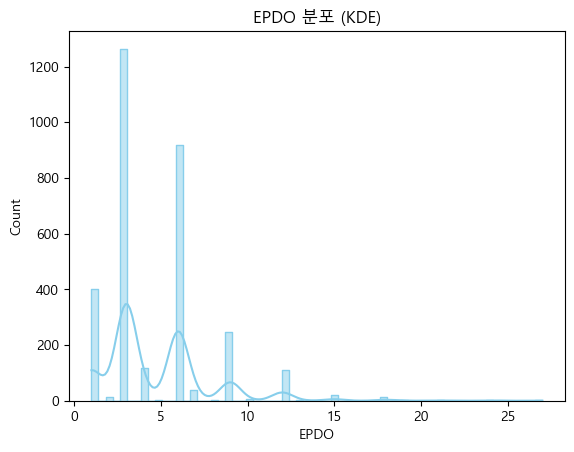

In [122]:
# 히스토그램 시각화 (커널 밀도 포함)
sns.histplot(df['EPDO'], kde=True, stat="count", color='skyblue', element="step")

# 히스토그램 막대는 제외하고 커널 밀도만 표시 (선택 사항)
# sns.kdeplot(df['EPDO'], color='blue')

plt.xlabel('EPDO')
plt.ylabel('Count')
plt.title('EPDO 분포 (KDE)')
plt.show()

# cctv_count와 EPDO 상관분석

Spearman 상관계수: -0.0472
Spearman 유의확률 (p-value): 0.0080


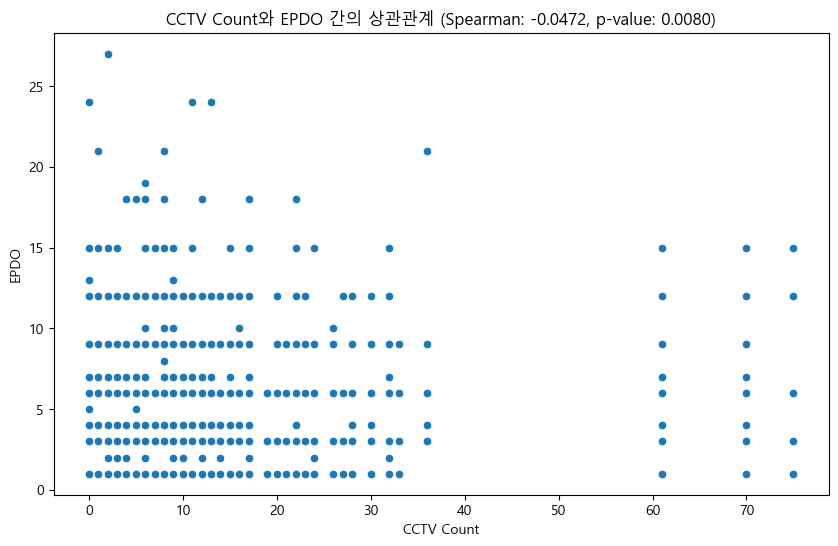

In [125]:
# Spearman 상관계수와 p-value 계산
spearman_corr, spearman_p_value = stats.spearmanr(df1['cctv_count'], df1['EPDO'])
print(f'Spearman 상관계수: {spearman_corr:.4f}')
print(f'Spearman 유의확률 (p-value): {spearman_p_value:.4f}')

# 산점도와 상관계수 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cctv_count', y='EPDO', data=df)
plt.xlabel('CCTV Count')
plt.ylabel('EPDO')
plt.title(f'CCTV Count와 EPDO 간의 상관관계 (Spearman: {spearman_corr:.4f}, p-value: {spearman_p_value:.4f})')
plt.show()

In [87]:
df.columns

Index(['요일', '법규위반', '노면상태', '기상상태', 'EPDO', '사고유형_1', 'cctv_count',
       'bus_count', '주차장_count', '어린이보호구역_count', '가해운전자 연령대', '피해운전자 연령대',
       '사고시간대', '도로형태'],
      dtype='object')

# 가설1. 요일에 따라 EPDO 차이가 있다. > 없음.


Tukey's HSD Test Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   금요일    목요일   0.0747 0.9998 -0.5045 0.6539  False
   금요일    수요일   0.0745 0.9998 -0.5234 0.6724  False
   금요일    월요일    0.242 0.8849 -0.3412 0.8253  False
   금요일    일요일   0.5175 0.1454 -0.0835 1.1184  False
   금요일    토요일   0.4225 0.3212 -0.1561  1.001  False
   금요일    화요일   0.1282 0.9955 -0.4635 0.7198  False
   목요일    수요일  -0.0002    1.0 -0.5984  0.598  False
   목요일    월요일   0.1673   0.98 -0.4162 0.7509  False
   목요일    일요일   0.4427 0.3108 -0.1585  1.044  False
   목요일    토요일   0.3477  0.567 -0.2311 0.9266  False
   목요일    화요일   0.0535    1.0 -0.5385 0.6454  False
   수요일    월요일   0.1675 0.9829 -0.4346 0.7696  False
   수요일    일요일   0.4429 0.3467 -0.1763 1.0622  False
   수요일    토요일   0.3479 0.6041 -0.2496 0.9455  False
   수요일    화요일   0.0537    1.0 -0.5566 0.6639  False
   월요일    일요일   0.2754 0.8317 -0.3297

<Figure size 1000x600 with 0 Axes>

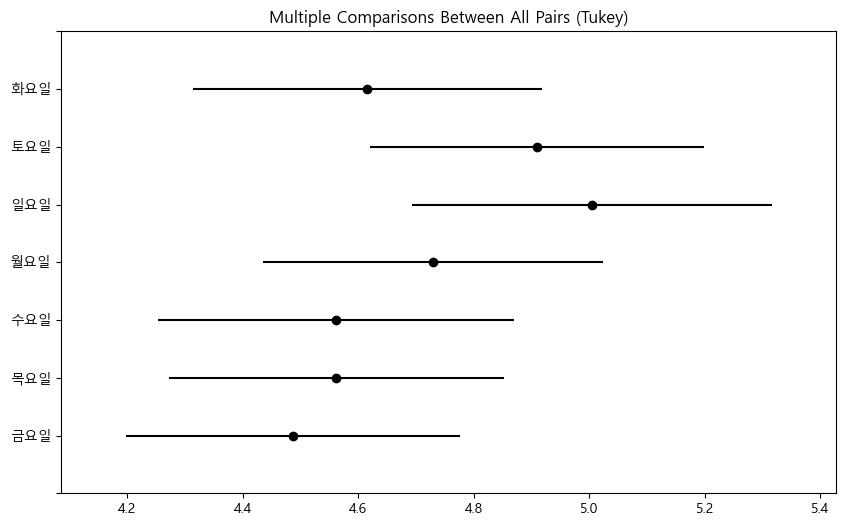

In [88]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Tukey's HSD 검정 수행
tukey = pairwise_tukeyhsd(endog=df['EPDO'], groups=df['요일'], alpha=0.05)

print("\nTukey's HSD Test Results:")
print(tukey)

# Tukey's HSD 결과 시각화 (하나의 그래프)
plt.figure(figsize=(10, 6))
tukey.plot_simultaneous()
plt.show()

# 가설2. 법규위반에 따라 EPDO 차이가 있나? 신호위반이 유독 높음

In [178]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)

(77,)
(1656,)
(603,)
(144,)
(250,)
(31,)
(143,)
(110,)
(0,)
(39,)


In [180]:
df['법규위반'].value_counts()

안전운전불이행      1656
신호위반          603
안전거리미확보       250
기타            144
교차로운행방법위반     143
중앙선침범         110
직진우회전진행방해     106
보행자보호의무위반      77
불법유턴           39
차로위반           31
Name: 법규위반, dtype: int64

In [182]:
df1 = df.loc[df['법규위반'] == '보행자보호의무위반']['EPDO']
df2 = df.loc[df['법규위반'] == '안전운전불이행']['EPDO']
df3 = df.loc[df['법규위반'] == '신호위반']['EPDO']
df4 = df.loc[df['법규위반'] == '기타']['EPDO']
df5 = df.loc[df['법규위반'] == '안전거리미확보']['EPDO']
df6 = df.loc[df['법규위반'] == '차로위반']['EPDO']
df7 = df.loc[df['법규위반'] == '교차로운행방법위반']['EPDO']
df8 = df.loc[df['법규위반'] == '중앙선침범']['EPDO']
df9 = df.loc[df['법규위반'] == '직진우회전진행방해']['EPDO']
df10 = df.loc[df['법규위반'] == '불법유턴']['EPDO']

f_result = f_oneway(df1, df2, df3, df4, df5, df6, df7, df8, df9, df10)
# F-통계량과 p-value를 반올림
f_statistic = round(f_result.statistic, 3)
p_value = round(f_result.pvalue, 3)

print('ANOVA')
print(f'F통계량 : {f_statistic}')
print(f'p-value : {p_value}')

ANOVA
F통계량 : 16.948
p-value : 0.0



Tukey's HSD Test Results:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
교차로운행방법위반        기타  -0.1431    1.0 -1.2506  0.9643  False
교차로운행방법위반 보행자보호의무위반   0.0799    1.0  -1.246  1.4059  False
교차로운행방법위반      불법유턴  -0.1725    1.0 -1.8671  1.5221  False
교차로운행방법위반      신호위반   1.2506 0.0003  0.3781  2.1232   True
교차로운행방법위반   안전거리미확보   0.2996 0.9941 -0.6839  1.2831  False
교차로운행방법위반   안전운전불이행  -0.4206 0.8343 -1.2382   0.397  False
교차로운행방법위반     중앙선침범   0.6643 0.7555 -0.5253   1.854  False
교차로운행방법위반 직진우회전진행방해    0.618 0.8349 -0.5843  1.8203  False
교차로운행방법위반      차로위반   0.5529 0.9951 -1.3056  2.4114  False
       기타 보행자보호의무위반    0.223    1.0 -1.1013  1.5474  False
       기타      불법유턴  -0.0294    1.0 -1.7227  1.6639  False
       기타      신호위반   1.3938    0.0  0.5237  2.2638   True
       기타   안전거리미확보   0.4427 0.9186 -0.5386  1.4241  False
       기타   안전운전불이행  -0.2775 

<Figure size 1000x600 with 0 Axes>

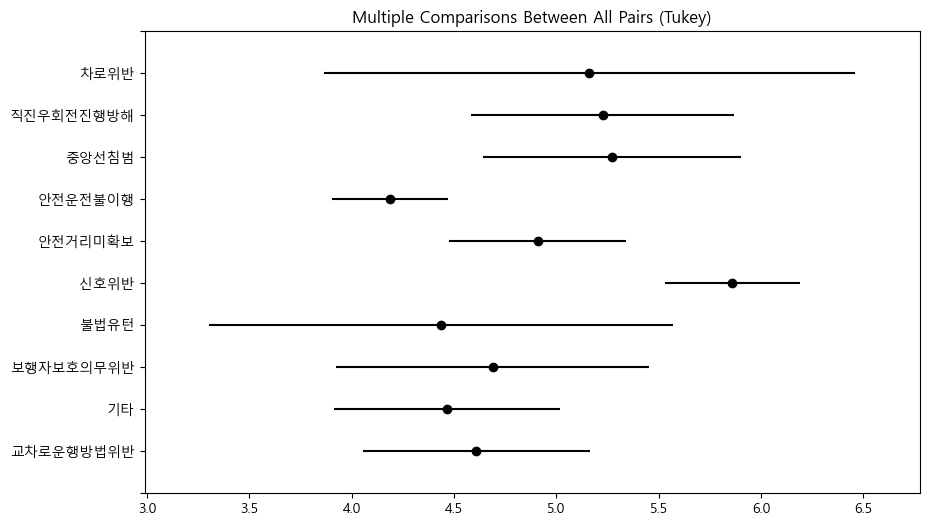

In [89]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Tukey's HSD 검정 수행
tukey = pairwise_tukeyhsd(endog=df['EPDO'], groups=df['법규위반'], alpha=0.05)

print("\nTukey's HSD Test Results:")
print(tukey)

# Tukey's HSD 결과 시각화 (하나의 그래프)
plt.figure(figsize=(10, 6))
tukey.plot_simultaneous()
plt.show()

# 신호위반 여부에 따른 EPDO 평균 > 신호위반하면 EPDO 평균이 더 높더라

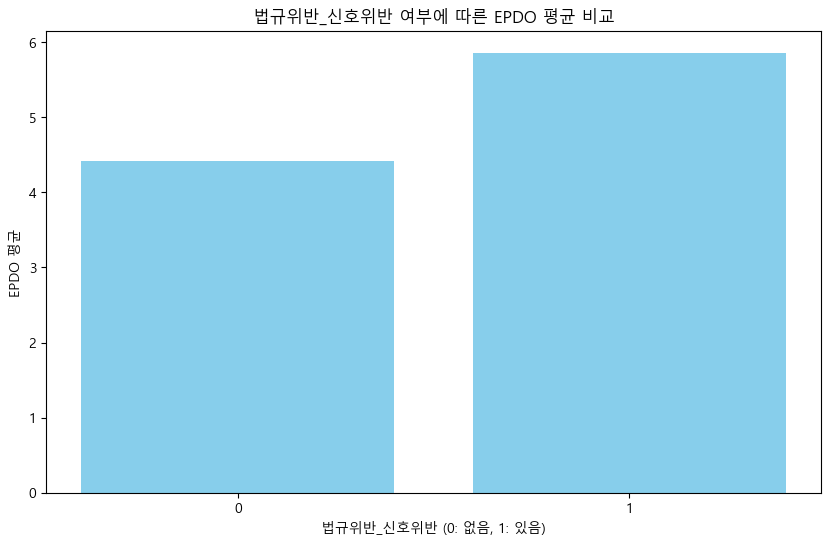

등분산성 검정
통계량 : 70.453
p-value : 0.0
2-sample t-test
t통계량 : 9.149270897265678
p-value : 4.901631197620235e-19


In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# 법규위반_신호위반에 따른 EPDO의 평균 계산
df_mean = df1.groupby('법규위반_신호위반')['EPDO'].mean().reset_index()

# 막대 그래프 시각화
plt.figure(figsize=(10, 6))
plt.bar(df_mean['법규위반_신호위반'].astype(str), df_mean['EPDO'], color='skyblue')
plt.xlabel('법규위반_신호위반 (0: 없음, 1: 있음)')  # x축 레이블
plt.ylabel('EPDO 평균')  # y축 레이블
plt.title('법규위반_신호위반 여부에 따른 EPDO 평균 비교')
plt.show()

df2 = df1[df1['법규위반_신호위반'] == 1]['EPDO']
df3 = df1[df1['법규위반_신호위반'] == 0]['EPDO']
# ttest를 위한 등분산성 검정
stats, p = bartlett(df2, df3)
print('등분산성 검정')
print(f'통계량 : {stats.round(3)}')
print(f'p-value : {p.round(3)}') # 이분산이다.
t_result = ttest_ind(df2,df3, equal_var = False)
t,p = t_result
print('2-sample t-test')
print(f't통계량 : {t}')
print(f'p-value : {p}') # 

# 안전운전불이행 : 안전운전불이행은 EPDO 평균이 낮더라

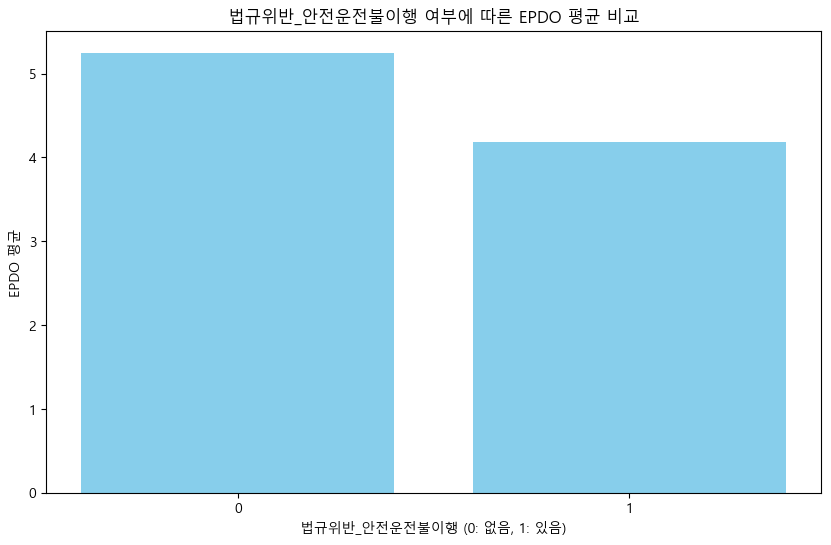

등분산성 검정
통계량 : 63.661
p-value : 0.0
2-sample t-test
t통계량 : -9.894080859670765
p-value : 1.0053751382513921e-22


In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# 법규위반_신호위반에 따른 EPDO의 평균 계산
df_mean = df1.groupby('법규위반_안전운전불이행')['EPDO'].mean().reset_index()

# 막대 그래프 시각화
plt.figure(figsize=(10, 6))
plt.bar(df_mean['법규위반_안전운전불이행'].astype(str), df_mean['EPDO'], color='skyblue')
plt.xlabel('법규위반_안전운전불이행 (0: 없음, 1: 있음)')  # x축 레이블
plt.ylabel('EPDO 평균')  # y축 레이블
plt.title('법규위반_안전운전불이행 여부에 따른 EPDO 평균 비교')
plt.show()

df2 = df1[df1['법규위반_안전운전불이행'] == 1]['EPDO']
df3 = df1[df1['법규위반_안전운전불이행'] == 0]['EPDO']
# ttest를 위한 등분산성 검정
stats, p = bartlett(df2, df3)
print('등분산성 검정')
print(f'통계량 : {stats.round(3)}')
print(f'p-value : {p.round(3)}') # 이분산이다.
t_result = ttest_ind(df2,df3, equal_var = False)
t,p = t_result
print('2-sample t-test')
print(f't통계량 : {t}')
print(f'p-value : {p}') # 

# 가설3. 노면상태 : 건조, 젖음/습기는 의미 있음


Tukey's HSD Test Results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    건조     기타    0.007    1.0  -2.3825  2.3965  False
    건조  서리/결빙   -2.743 0.7028   -8.586  3.0999  False
    건조     적설   -1.743 0.9786 -10.0047  6.5186  False
    건조  젖음/습기  -0.5639 0.0292  -1.0915 -0.0364   True
    기타  서리/결빙    -2.75 0.7574  -9.0589  3.5589  False
    기타     적설    -1.75 0.9813 -10.3475  6.8475  False
    기타  젖음/습기  -0.5709 0.9686  -3.0082  1.8664  False
 서리/결빙     적설      1.0 0.9988  -9.1167 11.1167  False
 서리/결빙  젖음/습기   2.1791 0.8488  -3.6835  8.0417  False
    적설  젖음/습기   1.1791 0.9952  -7.0965  9.4548  False
-----------------------------------------------------


<Figure size 1000x600 with 0 Axes>

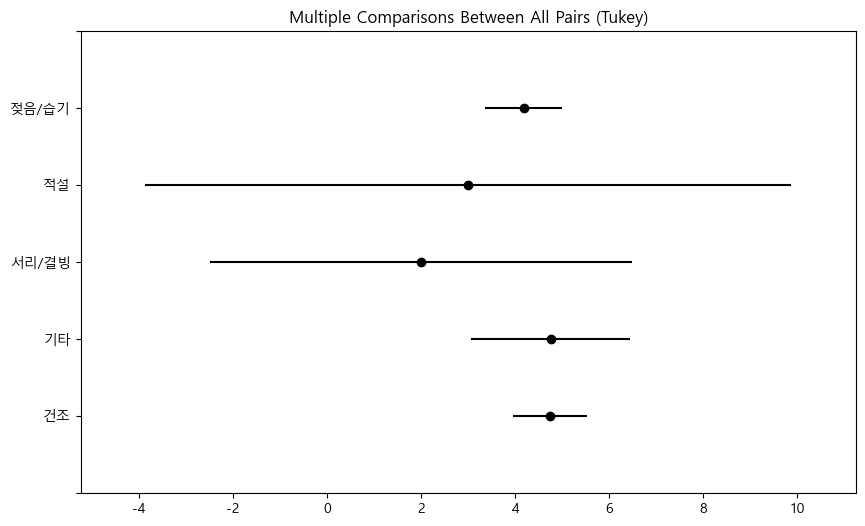

In [103]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Tukey's HSD 검정 수행
tukey = pairwise_tukeyhsd(endog=df['EPDO'], groups=df['노면상태'], alpha=0.05)

print("\nTukey's HSD Test Results:")
print(tukey)

# Tukey's HSD 결과 시각화 (하나의 그래프)
plt.figure(figsize=(10, 6))
tukey.plot_simultaneous()
plt.show()

# 젖음/습기 : 비가 오면 오히려 안전운전을 해서 사고가 안난다.

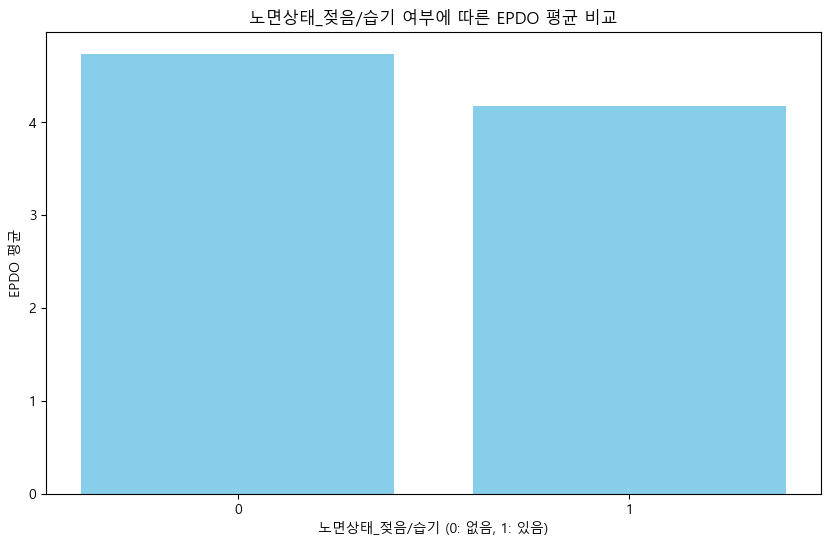

등분산성 검정
통계량 : 10.582
p-value : 0.001
2-sample t-test
t통계량 : -3.3001687481485615
p-value : 0.0010693033269778315


In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# 법규위반_신호위반에 따른 EPDO의 평균 계산
df_mean = df1.groupby('노면상태_젖음/습기')['EPDO'].mean().reset_index()

# 막대 그래프 시각화
plt.figure(figsize=(10, 6))
plt.bar(df_mean['노면상태_젖음/습기'].astype(str), df_mean['EPDO'], color='skyblue')
plt.xlabel('노면상태_젖음/습기 (0: 없음, 1: 있음)')  # x축 레이블
plt.ylabel('EPDO 평균')  # y축 레이블
plt.title('노면상태_젖음/습기 여부에 따른 EPDO 평균 비교')
plt.show()

df2 = df1[df1['노면상태_젖음/습기'] == 1]['EPDO']
df3 = df1[df1['노면상태_젖음/습기'] == 0]['EPDO']
# ttest를 위한 등분산성 검정
stats, p = bartlett(df2, df3)
print('등분산성 검정')
print(f'통계량 : {stats.round(3)}')
print(f'p-value : {p.round(3)}') # 이분산이다.
t_result = ttest_ind(df2,df3, equal_var = False)
t,p = t_result
print('2-sample t-test')
print(f't통계량 : {t}')
print(f'p-value : {p}') 

# 건조

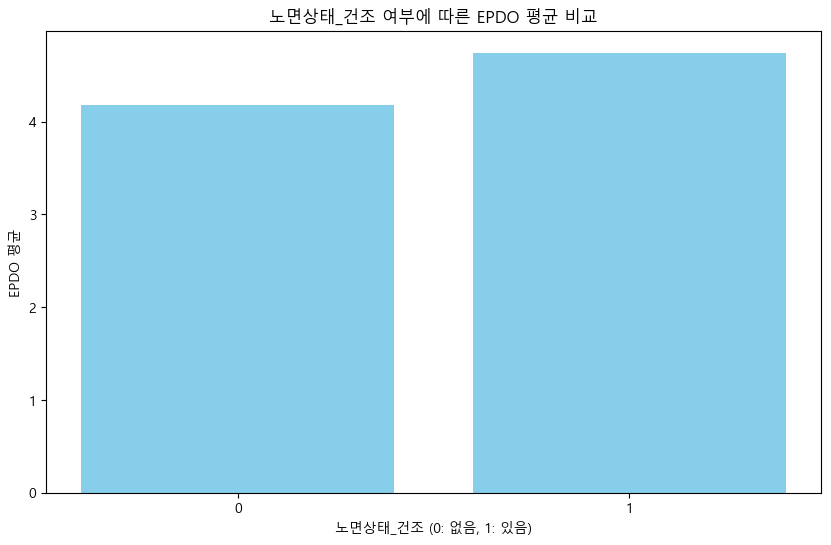

등분산성 검정
통계량 : 11.46
p-value : 0.001
2-sample t-test
t통계량 : 3.371124731995604
p-value : 0.000829304463019641


In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# 법규위반_신호위반에 따른 EPDO의 평균 계산
df_mean = df1.groupby('노면상태_건조')['EPDO'].mean().reset_index()

# 막대 그래프 시각화
plt.figure(figsize=(10, 6))
plt.bar(df_mean['노면상태_건조'].astype(str), df_mean['EPDO'], color='skyblue')
plt.xlabel('노면상태_건조 (0: 없음, 1: 있음)')  # x축 레이블
plt.ylabel('EPDO 평균')  # y축 레이블
plt.title('노면상태_건조 여부에 따른 EPDO 평균 비교')
plt.show()

df2 = df1[df1['노면상태_건조'] == 1]['EPDO']
df3 = df1[df1['노면상태_건조'] == 0]['EPDO']
# ttest를 위한 등분산성 검정
stats, p = bartlett(df2, df3)
print('등분산성 검정')
print(f'통계량 : {stats.round(3)}')
print(f'p-value : {p.round(3)}') # 이분산이다.
t_result = ttest_ind(df2,df3, equal_var = False)
t,p = t_result
print('2-sample t-test')
print(f't통계량 : {t}')
print(f'p-value : {p}') 

# 가설4. 기상상태 : 의미없음


Tukey's HSD Test Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    기타      눈   2.6944 0.5745 -2.2691  7.658  False
    기타     맑음   1.1881 0.7652 -1.5695 3.9457  False
    기타      비   0.6177 0.9752 -2.1962 3.4317  False
    기타     흐림    0.715  0.962 -2.1803 3.6104  False
     눈     맑음  -1.5064 0.8578 -5.6392 2.6264  False
     눈      비  -2.0767  0.654 -6.2473 2.0939  False
     눈     흐림  -1.9794 0.7046 -6.2054 2.2466  False
    맑음      비  -0.5703 0.0727 -1.1717  0.031  False
    맑음     흐림   -0.473 0.6147 -1.3822 0.4361  False
     비     흐림   0.0973 0.9992 -0.9706 1.1652  False
---------------------------------------------------


<Figure size 1000x600 with 0 Axes>

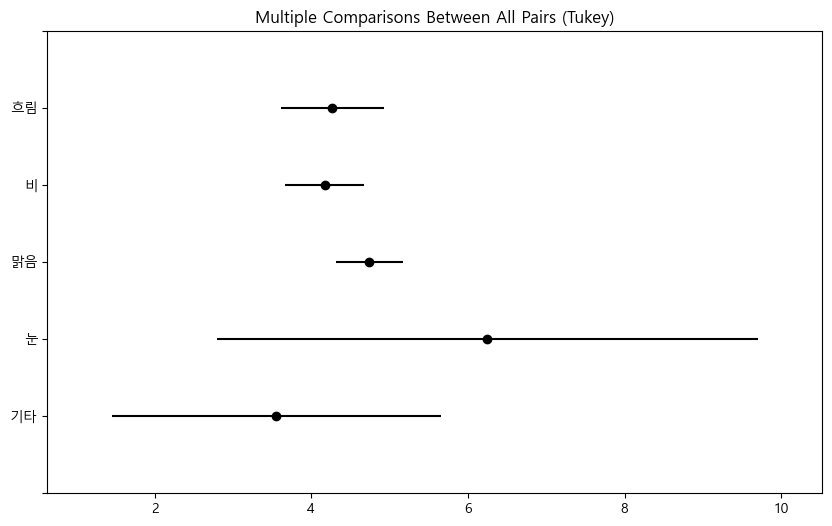

In [107]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Tukey's HSD 검정 수행
tukey = pairwise_tukeyhsd(endog=df['EPDO'], groups=df['기상상태'], alpha=0.05)

print("\nTukey's HSD Test Results:")
print(tukey)

# Tukey's HSD 결과 시각화 (하나의 그래프)
plt.figure(figsize=(10, 6))
tukey.plot_simultaneous()
plt.show()

# 가설5. 사고유형_1


Tukey's HSD Test Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 차대사람    차대차    0.2167 0.2999 -0.1263  0.5597  False
 차대사람   차량단독   -0.2985 0.4495 -0.8789  0.2818  False
  차대차   차량단독   -0.5152 0.0473 -1.0258 -0.0047   True
----------------------------------------------------


<Figure size 1000x600 with 0 Axes>

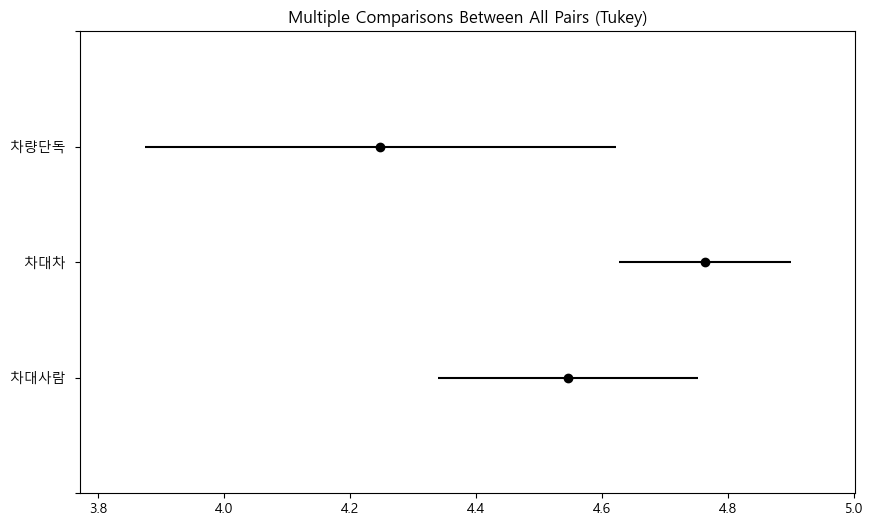

In [108]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Tukey's HSD 검정 수행
tukey = pairwise_tukeyhsd(endog=df['EPDO'], groups=df['사고유형_1'], alpha=0.05)

print("\nTukey's HSD Test Results:")
print(tukey)

# Tukey's HSD 결과 시각화 (하나의 그래프)
plt.figure(figsize=(10, 6))
tukey.plot_simultaneous()
plt.show()

# 차대차 : 차대차면 EPDO가 더 높음

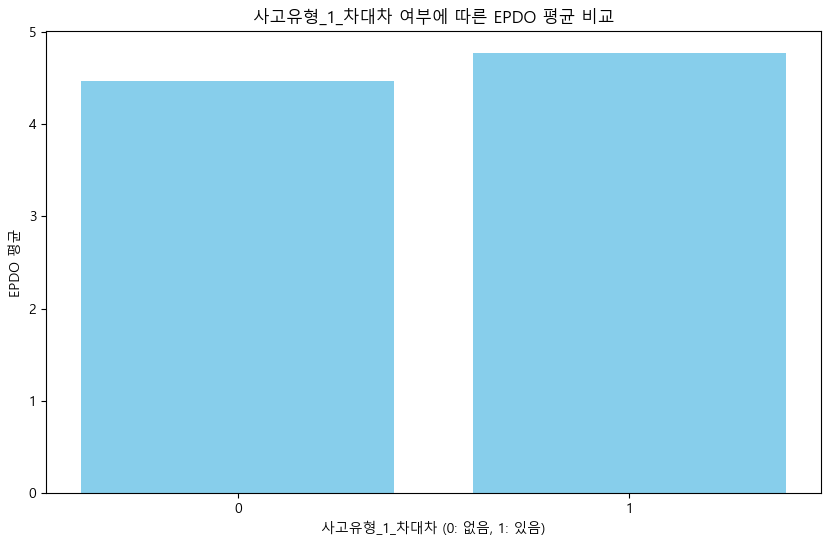

등분산성 검정
통계량 : 36.918
p-value : 0.0
2-sample t-test
t통계량 : 2.6178914175980768
p-value : 0.008941229997837332


In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# 법규위반_신호위반에 따른 EPDO의 평균 계산
df_mean = df1.groupby('사고유형_1_차대차 ')['EPDO'].mean().reset_index()

# 막대 그래프 시각화
plt.figure(figsize=(10, 6))
plt.bar(df_mean['사고유형_1_차대차 '].astype(str), df_mean['EPDO'], color='skyblue')
plt.xlabel('사고유형_1_차대차 (0: 없음, 1: 있음)')  # x축 레이블
plt.ylabel('EPDO 평균')  # y축 레이블
plt.title('사고유형_1_차대차 여부에 따른 EPDO 평균 비교')
plt.show()

df2 = df1[df1['사고유형_1_차대차 '] == 1]['EPDO']
df3 = df1[df1['사고유형_1_차대차 '] == 0]['EPDO']
# ttest를 위한 등분산성 검정
stats, p = bartlett(df2, df3)
print('등분산성 검정')
print(f'통계량 : {stats.round(3)}')
print(f'p-value : {p.round(3)}') # 이분산이다.
t_result = ttest_ind(df2,df3, equal_var = False)
t,p = t_result
print('2-sample t-test')
print(f't통계량 : {t}')
print(f'p-value : {p}') 

# 차량단독 : 유의하지 않음.

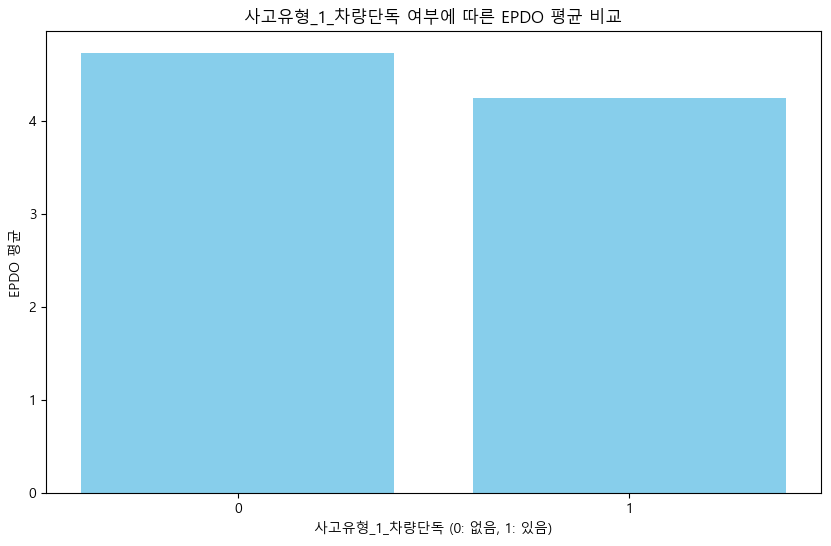

등분산성 검정
통계량 : 9.965
p-value : 0.002
2-sample t-test
t통계량 : -1.9324962416796294
p-value : 0.05451859061521791


In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# 법규위반_신호위반에 따른 EPDO의 평균 계산
df_mean = df1.groupby('사고유형_1_차량단독 ')['EPDO'].mean().reset_index()

# 막대 그래프 시각화
plt.figure(figsize=(10, 6))
plt.bar(df_mean['사고유형_1_차량단독 '].astype(str), df_mean['EPDO'], color='skyblue')
plt.xlabel('사고유형_1_차량단독 (0: 없음, 1: 있음)')  # x축 레이블
plt.ylabel('EPDO 평균')  # y축 레이블
plt.title('사고유형_1_차량단독 여부에 따른 EPDO 평균 비교')
plt.show()

df2 = df1[df1['사고유형_1_차량단독 '] == 1]['EPDO']
df3 = df1[df1['사고유형_1_차량단독 '] == 0]['EPDO']
# ttest를 위한 등분산성 검정
stats, p = bartlett(df2, df3)
print('등분산성 검정')
print(f'통계량 : {stats.round(3)}')
print(f'p-value : {p.round(3)}') # 이분산이다.
t_result = ttest_ind(df2,df3, equal_var = False)
t,p = t_result
print('2-sample t-test')
print(f't통계량 : {t}')
print(f'p-value : {p}') 

# 가설6. bus_count 상관분석 : 유의함

Spearman 상관계수: -0.0503
Spearman 유의확률 (p-value): 0.0047


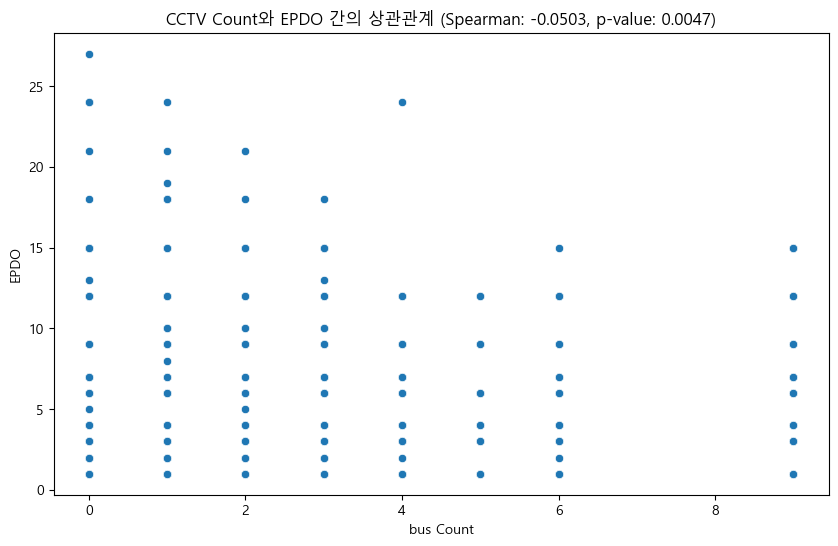

In [126]:
# Spearman 상관계수와 p-value 계산
spearman_corr, spearman_p_value = stats.spearmanr(df1['bus_count'], df1['EPDO'])
print(f'Spearman 상관계수: {spearman_corr:.4f}')
print(f'Spearman 유의확률 (p-value): {spearman_p_value:.4f}')

# 산점도와 상관계수 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bus_count', y='EPDO', data=df)
plt.xlabel('bus Count')
plt.ylabel('EPDO')
plt.title(f'CCTV Count와 EPDO 간의 상관관계 (Spearman: {spearman_corr:.4f}, p-value: {spearman_p_value:.4f})')
plt.show()

# 가설7. 주차장_count : 유의함

Spearman 상관계수: -0.0506
Spearman 유의확률 (p-value): 0.0044


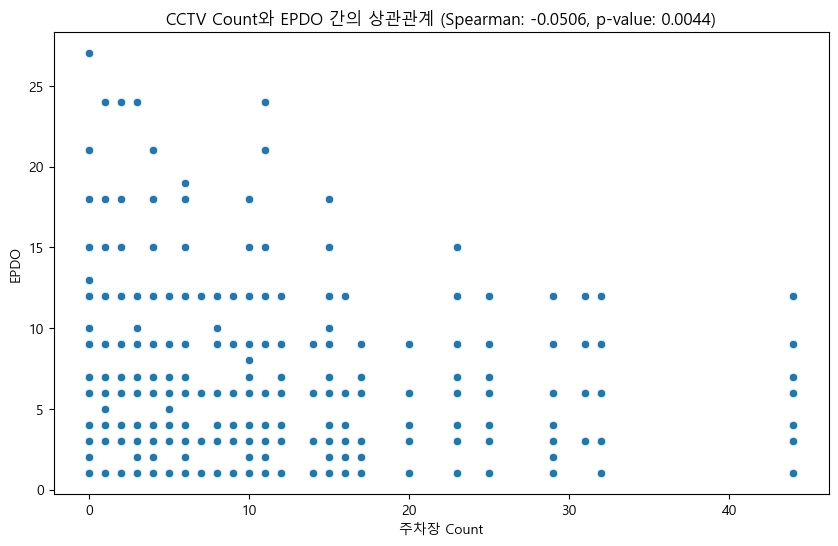

In [127]:
# Spearman 상관계수와 p-value 계산
spearman_corr, spearman_p_value = stats.spearmanr(df1['주차장_count'], df1['EPDO'])
print(f'Spearman 상관계수: {spearman_corr:.4f}')
print(f'Spearman 유의확률 (p-value): {spearman_p_value:.4f}')

# 산점도와 상관계수 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='주차장_count', y='EPDO', data=df)
plt.xlabel('주차장 Count')
plt.ylabel('EPDO')
plt.title(f'CCTV Count와 EPDO 간의 상관관계 (Spearman: {spearman_corr:.4f}, p-value: {spearman_p_value:.4f})')
plt.show()

# 가설8. 어린이보호구역 : 의미없음

Spearman 상관계수: -0.0284
Spearman 유의확률 (p-value): 0.1100


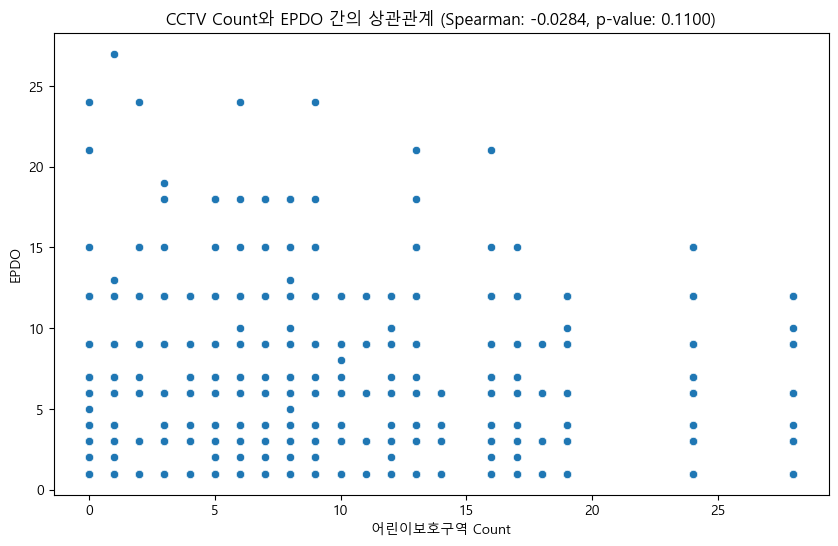

In [129]:
# Spearman 상관계수와 p-value 계산
spearman_corr, spearman_p_value = stats.spearmanr(df1['어린이보호구역_count'], df1['EPDO'])
print(f'Spearman 상관계수: {spearman_corr:.4f}')
print(f'Spearman 유의확률 (p-value): {spearman_p_value:.4f}')

# 산점도와 상관계수 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='어린이보호구역_count', y='EPDO', data=df)
plt.xlabel('어린이보호구역 Count')
plt.ylabel('EPDO')
plt.title(f'CCTV Count와 EPDO 간의 상관관계 (Spearman: {spearman_corr:.4f}, p-value: {spearman_p_value:.4f})')
plt.show()

# 가설9. 가해운전자 연령대 : 청소년이 높음


Tukey's HSD Test Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    노년    미분류  -2.1532 0.0245 -4.1383 -0.1682   True
    노년     장년  -0.1242  0.992  -0.729  0.4807  False
    노년     중년   0.3803 0.3691 -0.1745  0.9351  False
    노년     청년   0.1231 0.9902 -0.4506  0.6969  False
    노년    청소년   0.5815  0.131 -0.0878  1.2508  False
   미분류     장년   2.0291 0.0369  0.0724  3.9858   True
   미분류     중년   2.5335 0.0028  0.5917  4.4753   True
   미분류     청년   2.2764 0.0112  0.3291  4.2237   True
   미분류    청소년   2.7347 0.0012  0.7572  4.7123   True
    장년     중년   0.5044 0.0148  0.0617  0.9471   True
    장년     청년   0.2473 0.6563 -0.2189  0.7135  False
    장년    청소년   0.7057  0.007  0.1259  1.2854   True
    중년     청년  -0.2571 0.4423 -0.6564  0.1421  False
    중년    청소년   0.2012 0.8863 -0.3261  0.7286  False
    청년    청소년   0.4584 0.1606 -0.0889  1.0057  False
-------------------

<Figure size 1000x600 with 0 Axes>

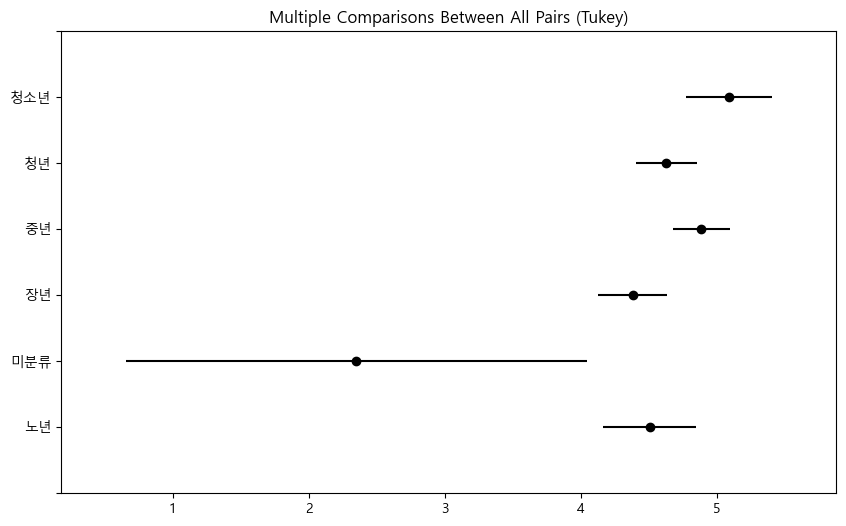

In [130]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Tukey's HSD 검정 수행
tukey = pairwise_tukeyhsd(endog=df['EPDO'], groups=df['가해운전자 연령대'], alpha=0.05)

print("\nTukey's HSD Test Results:")
print(tukey)

# Tukey's HSD 결과 시각화 (하나의 그래프)
plt.figure(figsize=(10, 6))
tukey.plot_simultaneous()
plt.show()

# 청소년 : 청소년이면 EPDO가 더 높음. 청소년들이 안전운전을 안함.

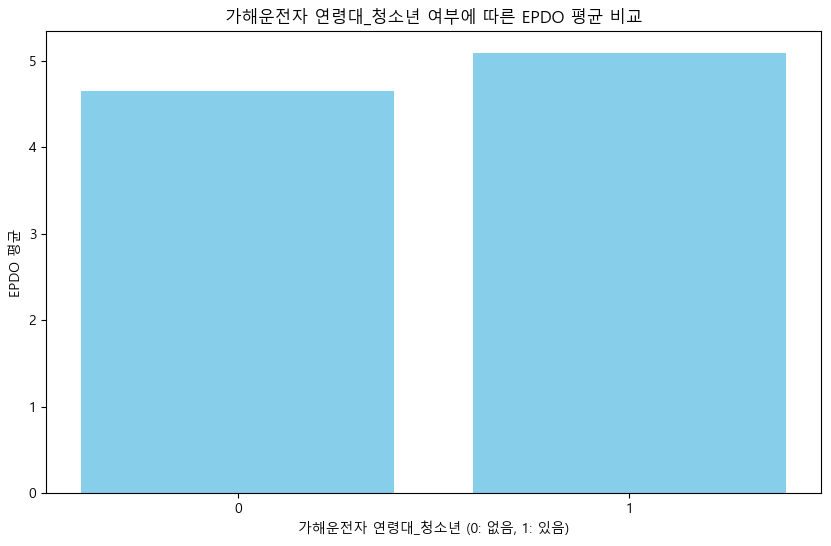

등분산성 검정
통계량 : 33.56
p-value : 0.0
2-sample t-test
t통계량 : 2.1833346311420354
p-value : 0.029574056967479743


In [131]:
import pandas as pd
import matplotlib.pyplot as plt

# 법규위반_신호위반에 따른 EPDO의 평균 계산
df_mean = df1.groupby('가해운전자 연령대_청소년')['EPDO'].mean().reset_index()

# 막대 그래프 시각화
plt.figure(figsize=(10, 6))
plt.bar(df_mean['가해운전자 연령대_청소년'].astype(str), df_mean['EPDO'], color='skyblue')
plt.xlabel('가해운전자 연령대_청소년 (0: 없음, 1: 있음)')  # x축 레이블
plt.ylabel('EPDO 평균')  # y축 레이블
plt.title('가해운전자 연령대_청소년 여부에 따른 EPDO 평균 비교')
plt.show()

df2 = df1[df1['가해운전자 연령대_청소년'] == 1]['EPDO']
df3 = df1[df1['가해운전자 연령대_청소년'] == 0]['EPDO']
# ttest를 위한 등분산성 검정
stats, p = bartlett(df2, df3)
print('등분산성 검정')
print(f'통계량 : {stats.round(3)}')
print(f'p-value : {p.round(3)}') # 이분산이다.
t_result = ttest_ind(df2,df3, equal_var = False)
t,p = t_result
print('2-sample t-test')
print(f't통계량 : {t}')
print(f'p-value : {p}') 

# 청소년들의 운전습관 확인 : 신호위반을 많이 함.

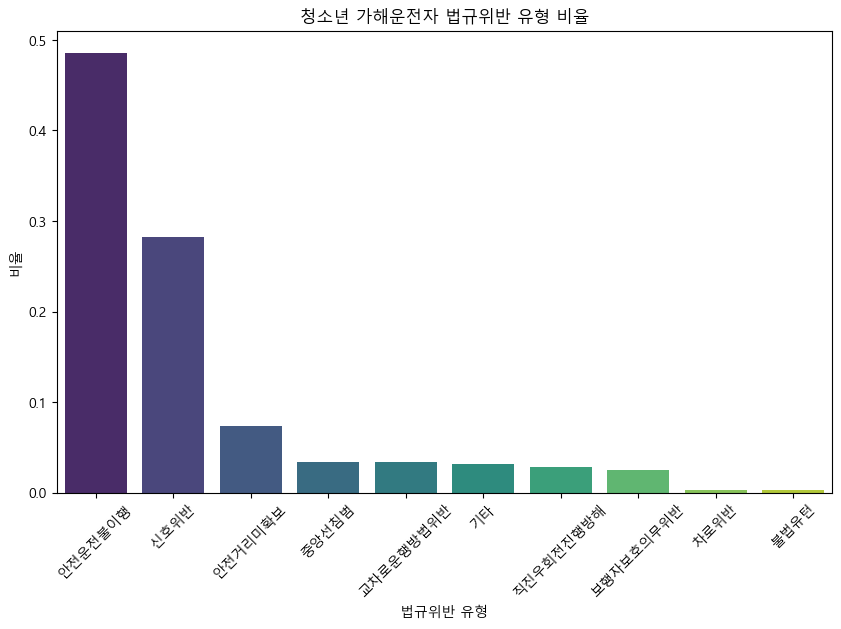

In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# '가해운전자 연령대'가 '청소년'인 데이터만 필터링
filtered_df = df[df['가해운전자 연령대'] == '청소년']

# 법규위반 유형의 빈도 계산
count_data = filtered_df['법규위반'].value_counts().reset_index()
count_data.columns = ['법규위반', '빈도']

# 빈도를 비율로 변환
count_data['비율'] = count_data['빈도'] / count_data['빈도'].sum()

# 비율 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='법규위반', y='비율', data=count_data, palette='viridis')
plt.xlabel('법규위반 유형')  # x축 레이블
plt.ylabel('비율')  # y축 레이블
plt.title('청소년 가해운전자 법규위반 유형 비율')
plt.xticks(rotation=45)  # x축 레이블 회전 (필요에 따라 조정)
plt.show()


# 비청소년들 

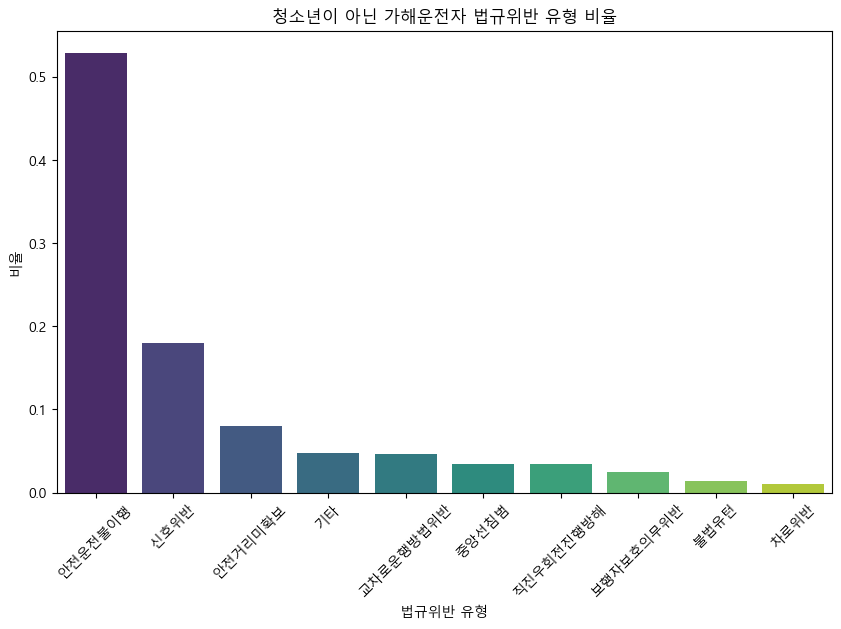

In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# '가해운전자 연령대'가 '청소년'인 데이터만 필터링
filtered_df = df[df['가해운전자 연령대'] != '청소년']

# 법규위반 유형의 빈도 계산
count_data = filtered_df['법규위반'].value_counts().reset_index()
count_data.columns = ['법규위반', '빈도']

# 빈도를 비율로 변환
count_data['비율'] = count_data['빈도'] / count_data['빈도'].sum()

# 비율 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='법규위반', y='비율', data=count_data, palette='viridis')
plt.xlabel('법규위반 유형')  # x축 레이블
plt.ylabel('비율')  # y축 레이블
plt.title('청소년이 아닌 가해운전자 법규위반 유형 비율')
plt.xticks(rotation=45)  # x축 레이블 회전 (필요에 따라 조정)
plt.show()


# 가설10. 피해운전자 연령대 : 중년이 높음


Tukey's HSD Test Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    노년    미분류  -0.5762 0.2015 -1.2959 0.1436  False
    노년     장년  -0.1715 0.9321 -0.6838 0.3409  False
    노년     중년   0.2529 0.7139 -0.2544 0.7602  False
    노년     청년   0.0416    1.0 -0.5517  0.635  False
    노년    청소년  -0.4949 0.5458 -1.3355 0.3456  False
   미분류     장년   0.4047 0.4689 -0.2381 1.0475  False
   미분류     중년   0.8291  0.003  0.1903 1.4678   True
   미분류     청년   0.6178 0.1289 -0.0912 1.3268  False
   미분류    청소년   0.0812 0.9999 -0.8446  1.007  False
    장년     중년   0.4244  0.024  0.0339 0.8148   True
    장년     청년   0.2131 0.8261  -0.284 0.7102  False
    장년    청소년  -0.3235 0.8422 -1.0991 0.4521  False
    중년     청년  -0.2113 0.8248 -0.7032 0.2806  False
    중년    청소년  -0.7479 0.0641 -1.5201 0.0244  False
    청년    청소년  -0.5366 0.4397 -1.3679 0.2948  False
-------------------------------------

<Figure size 1000x600 with 0 Axes>

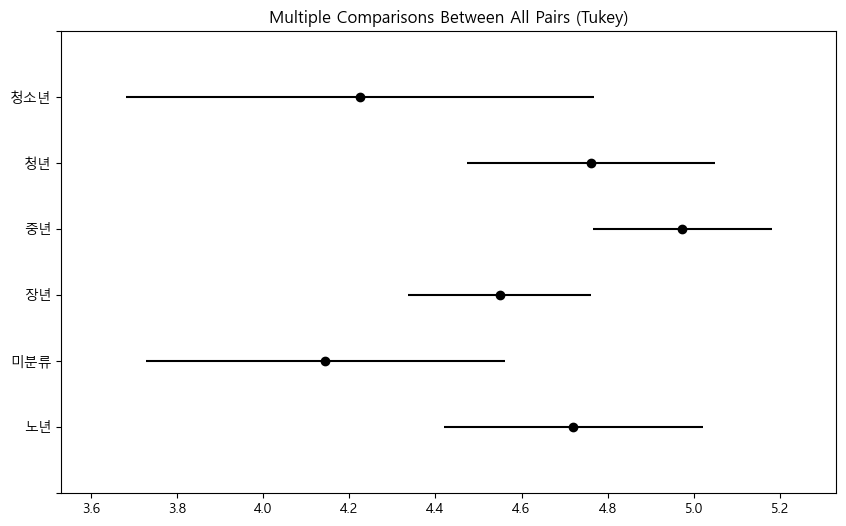

In [141]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Tukey's HSD 검정 수행
tukey = pairwise_tukeyhsd(endog=df['EPDO'], groups=df['피해운전자 연령대'], alpha=0.05)

print("\nTukey's HSD Test Results:")
print(tukey)

# Tukey's HSD 결과 시각화 (하나의 그래프)
plt.figure(figsize=(10, 6))
tukey.plot_simultaneous()
plt.show()

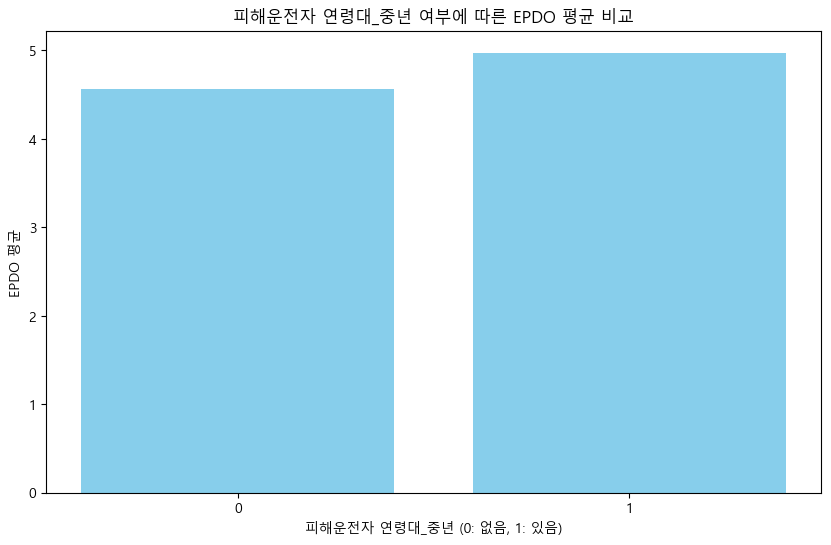

등분산성 검정
통계량 : 26.475
p-value : 0.0
2-sample t-test
t통계량 : 3.394688866098467
p-value : 0.0007024228457430811


In [142]:
import pandas as pd
import matplotlib.pyplot as plt

# 법규위반_신호위반에 따른 EPDO의 평균 계산
df_mean = df1.groupby('피해운전자 연령대_중년')['EPDO'].mean().reset_index()

# 막대 그래프 시각화
plt.figure(figsize=(10, 6))
plt.bar(df_mean['피해운전자 연령대_중년'].astype(str), df_mean['EPDO'], color='skyblue')
plt.xlabel('피해운전자 연령대_중년 (0: 없음, 1: 있음)')  # x축 레이블
plt.ylabel('EPDO 평균')  # y축 레이블
plt.title('피해운전자 연령대_중년 여부에 따른 EPDO 평균 비교')
plt.show()

df2 = df1[df1['피해운전자 연령대_중년'] == 1]['EPDO']
df3 = df1[df1['피해운전자 연령대_중년'] == 0]['EPDO']
# ttest를 위한 등분산성 검정
stats, p = bartlett(df2, df3)
print('등분산성 검정')
print(f'통계량 : {stats.round(3)}')
print(f'p-value : {p.round(3)}') # 이분산이다.
t_result = ttest_ind(df2,df3, equal_var = False)
t,p = t_result
print('2-sample t-test')
print(f't통계량 : {t}')
print(f'p-value : {p}') 

# 중년은 차대차가 많아서 EPDO가 높음.

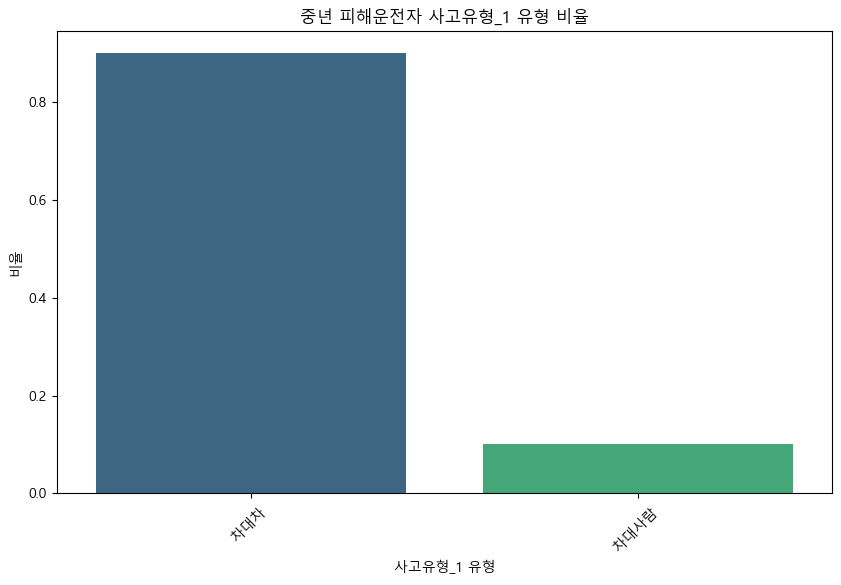

In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# '가해운전자 연령대'가 '청소년'인 데이터만 필터링
filtered_df = df[df['피해운전자 연령대'] == '중년']

# 법규위반 유형의 빈도 계산
count_data = filtered_df['사고유형_1'].value_counts().reset_index()
count_data.columns = ['사고유형_1', '빈도']

# 빈도를 비율로 변환
count_data['비율'] = count_data['빈도'] / count_data['빈도'].sum()

# 비율 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='사고유형_1', y='비율', data=count_data, palette='viridis')
plt.xlabel('사고유형_1 유형')  # x축 레이블
plt.ylabel('비율')  # y축 레이블
plt.title('중년 피해운전자 사고유형_1 유형 비율')
plt.xticks(rotation=45)  # x축 레이블 회전 (필요에 따라 조정)
plt.show()


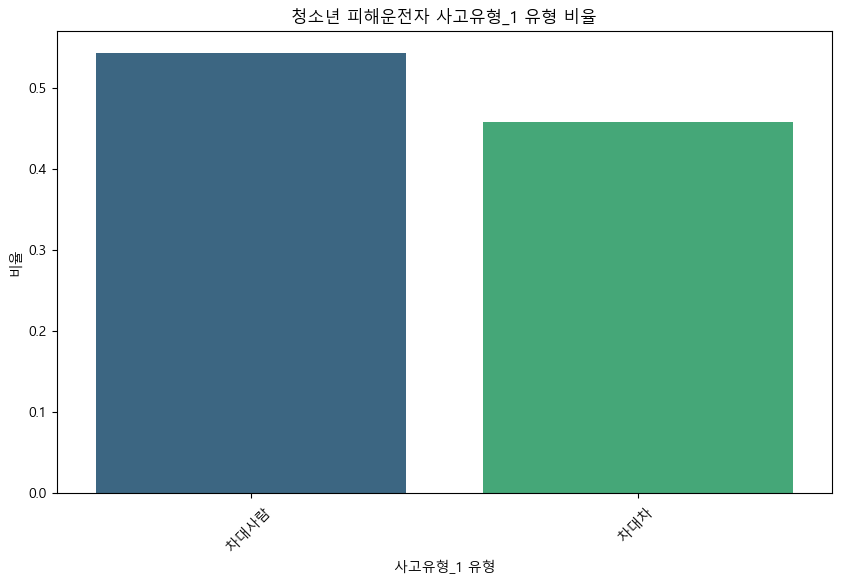

In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# '가해운전자 연령대'가 '청소년'인 데이터만 필터링
filtered_df = df[df['피해운전자 연령대'] == '청소년']

# 법규위반 유형의 빈도 계산
count_data = filtered_df['사고유형_1'].value_counts().reset_index()
count_data.columns = ['사고유형_1', '빈도']

# 빈도를 비율로 변환
count_data['비율'] = count_data['빈도'] / count_data['빈도'].sum()

# 비율 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='사고유형_1', y='비율', data=count_data, palette='viridis')
plt.xlabel('사고유형_1 유형')  # x축 레이블
plt.ylabel('비율')  # y축 레이블
plt.title('청소년 피해운전자 사고유형_1 유형 비율')
plt.xticks(rotation=45)  # x축 레이블 회전 (필요에 따라 조정)
plt.show()


# 피해자가 중년이면 EPDO가 높아. 왜? 가설1. 중년들은 차를 많이 끄니까 박았다하면 중상이상이지 않을까?
# > 청소년 : 차대차 : 40%, 중년 85%

# 가설11. 사고시간대 : 새벽에 높음


Tukey's HSD Test Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    새벽     오후  -0.9504 0.0001 -1.5401 -0.3607   True
    새벽     저녁  -0.7979 0.0003 -1.3348  -0.261   True
    새벽     점심  -0.8031 0.0012 -1.3859 -0.2203   True
    새벽     출근  -0.7613 0.0067 -1.3847 -0.1379   True
    새벽     퇴근  -0.4276 0.2954 -1.0125  0.1572  False
    오후     저녁   0.1525 0.9476 -0.3329  0.6379  False
    오후     점심   0.1473 0.9703 -0.3885   0.683  False
    오후     출근    0.189 0.9389 -0.3906  0.7687  False
    오후     퇴근   0.5227 0.0625 -0.0152  1.0607  False
    저녁     점심  -0.0052    1.0 -0.4822  0.4718  False
    저녁     출근   0.0366    1.0 -0.4893  0.5624  False
    저녁     퇴근   0.3703 0.2371 -0.1093  0.8498  False
    점심     출근   0.0417 0.9999 -0.5309  0.6144  False
    점심     퇴근   0.3754  0.332  -0.155  0.9059  False
    출근     퇴근   0.3337 0.5615 -0.2411  0.9085  False
-------------------

<Figure size 1000x600 with 0 Axes>

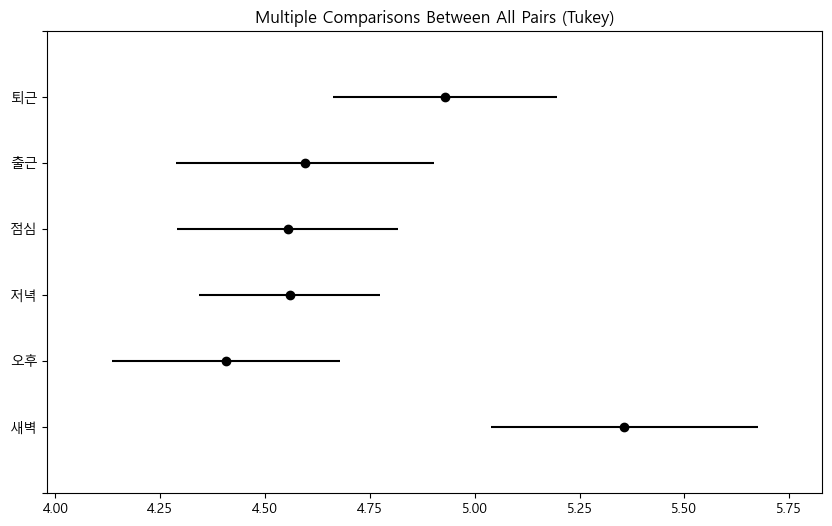

In [147]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Tukey's HSD 검정 수행
tukey = pairwise_tukeyhsd(endog=df['EPDO'], groups=df['사고시간대'], alpha=0.05)

print("\nTukey's HSD Test Results:")
print(tukey)

# Tukey's HSD 결과 시각화 (하나의 그래프)
plt.figure(figsize=(10, 6))
tukey.plot_simultaneous()
plt.show()

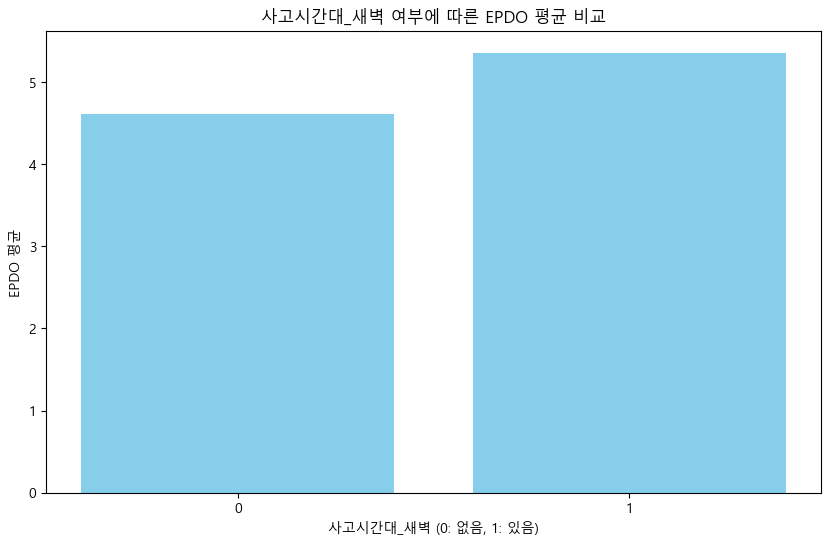

등분산성 검정
통계량 : 50.74
p-value : 0.0
2-sample t-test
t통계량 : 3.690080632691131
p-value : 0.00025303917464150947


In [148]:
import pandas as pd
import matplotlib.pyplot as plt

# 법규위반_신호위반에 따른 EPDO의 평균 계산
df_mean = df1.groupby('사고시간대_새벽')['EPDO'].mean().reset_index()

# 막대 그래프 시각화
plt.figure(figsize=(10, 6))
plt.bar(df_mean['사고시간대_새벽'].astype(str), df_mean['EPDO'], color='skyblue')
plt.xlabel('사고시간대_새벽 (0: 없음, 1: 있음)')  # x축 레이블
plt.ylabel('EPDO 평균')  # y축 레이블
plt.title('사고시간대_새벽 여부에 따른 EPDO 평균 비교')
plt.show()

df2 = df1[df1['사고시간대_새벽'] == 1]['EPDO']
df3 = df1[df1['사고시간대_새벽'] == 0]['EPDO']
# ttest를 위한 등분산성 검정
stats, p = bartlett(df2, df3)
print('등분산성 검정')
print(f'통계량 : {stats.round(3)}')
print(f'p-value : {p.round(3)}') # 이분산이다.
t_result = ttest_ind(df2,df3, equal_var = False)
t,p = t_result
print('2-sample t-test')
print(f't통계량 : {t}')
print(f'p-value : {p}') 

# 새벽시간대가 오후에 비해 신호위반이 2배 가량 높더라

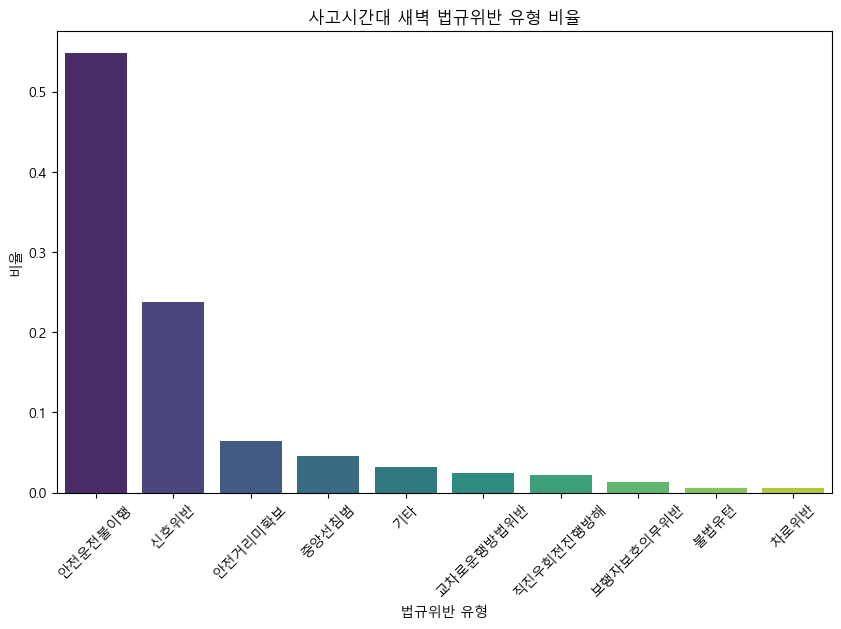

In [150]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# '가해운전자 연령대'가 '청소년'인 데이터만 필터링
filtered_df = df[df['사고시간대'] == '새벽']

# 법규위반 유형의 빈도 계산
count_data = filtered_df['법규위반'].value_counts().reset_index()
count_data.columns = ['법규위반', '빈도']

# 빈도를 비율로 변환
count_data['비율'] = count_data['빈도'] / count_data['빈도'].sum()

# 비율 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='법규위반', y='비율', data=count_data, palette='viridis')
plt.xlabel('법규위반 유형')  # x축 레이블
plt.ylabel('비율')  # y축 레이블
plt.title('사고시간대 새벽 법규위반 유형 비율')
plt.xticks(rotation=45)  # x축 레이블 회전 (필요에 따라 조정)
plt.show()


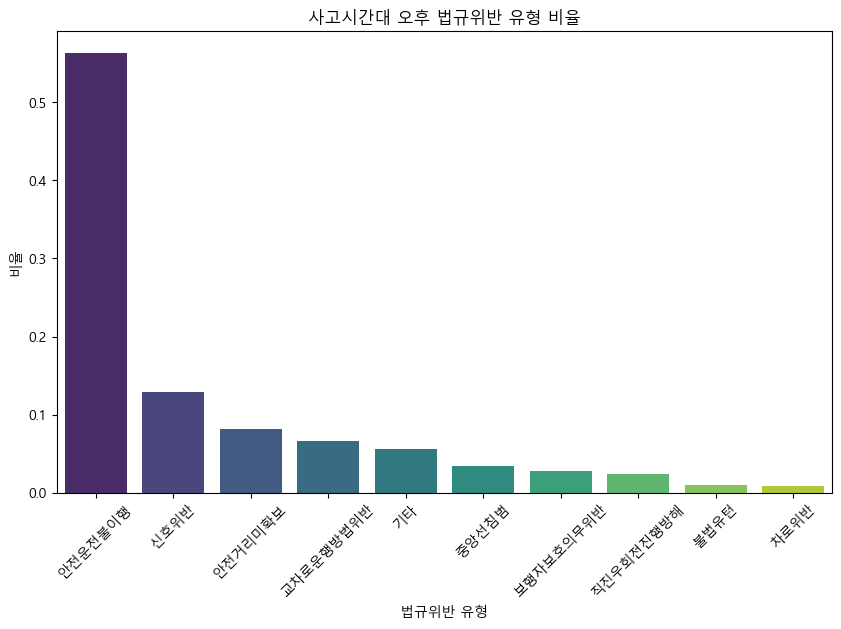

In [152]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# '가해운전자 연령대'가 '청소년'인 데이터만 필터링
filtered_df = df[df['사고시간대'] == '오후']

# 법규위반 유형의 빈도 계산
count_data = filtered_df['법규위반'].value_counts().reset_index()
count_data.columns = ['법규위반', '빈도']

# 빈도를 비율로 변환
count_data['비율'] = count_data['빈도'] / count_data['빈도'].sum()

# 비율 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='법규위반', y='비율', data=count_data, palette='viridis')
plt.xlabel('법규위반 유형')  # x축 레이블
plt.ylabel('비율')  # y축 레이블
plt.title('사고시간대 오후 법규위반 유형 비율')
plt.xticks(rotation=45)  # x축 레이블 회전 (필요에 따라 조정)
plt.show()


# 가설12. 도로형태


Tukey's HSD Test Results:
         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
    교차로 - 교차로부근      교차로 - 교차로안   0.4788 0.1415 -0.0653  1.0228  False
    교차로 - 교차로부근  교차로 - 교차로횡단보도내    0.339 0.9665  -0.529  1.2069  False
    교차로 - 교차로부근         기타 - 기타  -0.2268 0.9973 -1.0516  0.5981  False
    교차로 - 교차로부근     단일로 - 고가도로위   1.5424  0.944  -2.098  5.1828  False
    교차로 - 교차로부근        단일로 - 교량   0.6303 0.9992 -2.0582  3.3188  False
    교차로 - 교차로부근        단일로 - 기타  -0.1232 0.9991 -0.6418  0.3954  False
    교차로 - 교차로부근 단일로 - 지하차도(도로)내  -0.4893 0.9821 -1.8647   0.886  False
    교차로 - 교차로부근        단일로 - 터널  -0.1004    1.0 -4.0283  3.8274  False
    교차로 - 교차로부근       주차장 - 주차장  -1.2671 0.9994 -6.8039  4.2697  False
     교차로 - 교차로안  교차로 - 교차로횡단보도내  -0.1398 0.9999 -0.9462  0.6666  False
     교차로 - 교차로안         기타 - 기타  -0.7055 0.0953 -1

<Figure size 1000x600 with 0 Axes>

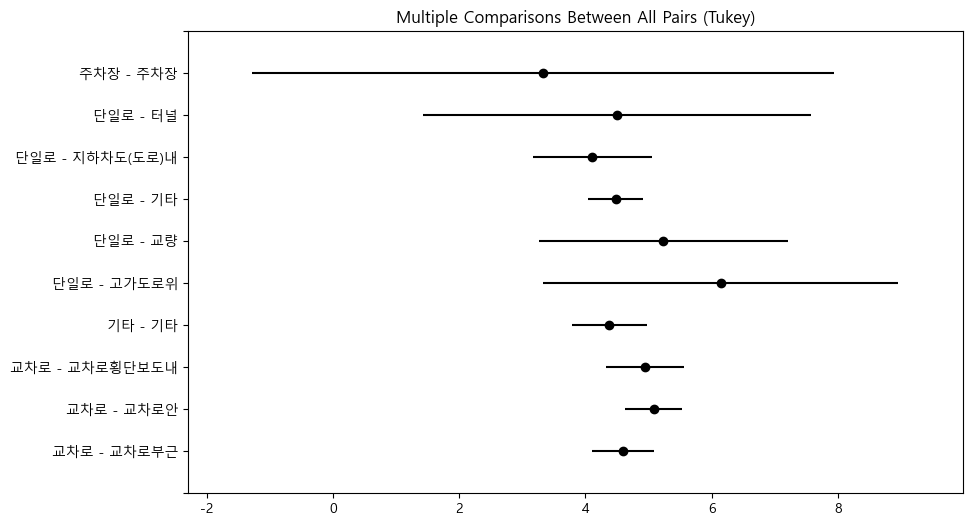

In [155]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Tukey's HSD 검정 수행
tukey = pairwise_tukeyhsd(endog=df['EPDO'], groups=df['도로형태'], alpha=0.05)

print("\nTukey's HSD Test Results:")
print(tukey)

# Tukey's HSD 결과 시각화 (하나의 그래프)
plt.figure(figsize=(10, 6))
tukey.plot_simultaneous()
plt.show()

# 주차장 확인

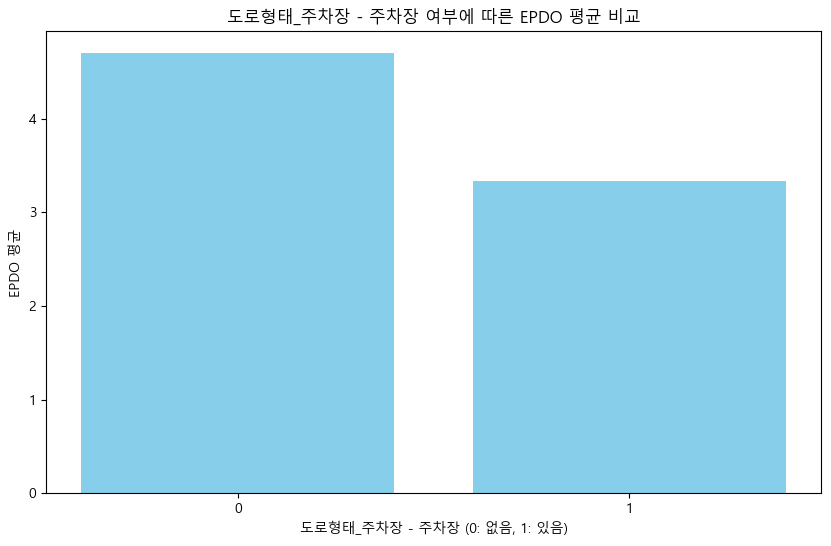

등분산성 검정
통계량 : 0.105
p-value : 0.746
2-sample t-test
t통계량 : -0.935990867275125
p-value : 0.4478530785681482


In [157]:
import pandas as pd
import matplotlib.pyplot as plt

# 법규위반_신호위반에 따른 EPDO의 평균 계산
df_mean = df1.groupby('도로형태_주차장 - 주차장')['EPDO'].mean().reset_index()

# 막대 그래프 시각화
plt.figure(figsize=(10, 6))
plt.bar(df_mean['도로형태_주차장 - 주차장'].astype(str), df_mean['EPDO'], color='skyblue')
plt.xlabel('도로형태_주차장 - 주차장 (0: 없음, 1: 있음)')  # x축 레이블
plt.ylabel('EPDO 평균')  # y축 레이블
plt.title('도로형태_주차장 - 주차장 여부에 따른 EPDO 평균 비교')
plt.show()

df2 = df1[df1['도로형태_주차장 - 주차장'] == 1]['EPDO']
df3 = df1[df1['도로형태_주차장 - 주차장'] == 0]['EPDO']
# ttest를 위한 등분산성 검정
stats, p = bartlett(df2, df3)
print('등분산성 검정')
print(f'통계량 : {stats.round(3)}')
print(f'p-value : {p.round(3)}') # 이분산이다.
t_result = ttest_ind(df2,df3, equal_var = False)
t,p = t_result
print('2-sample t-test')
print(f't통계량 : {t}')
print(f'p-value : {p}')